<a href="https://colab.research.google.com/github/kingdraw69/class-ciencia-de-datos/blob/main/17/03/2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
!pip install statsmodels
!pip install wquantiles

1 Analizando datafranes

In [17]:
import pandas as pd
import numpy as np
from scipy.stats import trim_mean
from statsmodels import robust
import wquantiles
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
estado=pd.read_csv("/content/state.csv")
estado.head()

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA


In [ ]:
estado.sample(10)

,State,Population,Murder.Rate,Abbreviation
32,North Carolina,9535483,5.1,NC
39,South Carolina,4625364,6.4,SC
23,Mississippi,2967297,8.6,MS
44,Vermont,625741,1.6,VT
38,Rhode Island,1052567,2.4,RI
43,Utah,2763885,2.3,UT
37,Pennsylvania,12702379,4.8,PA
28,New Hampshire,1316470,0.9,NH
1,Alaska,710231,5.6,AK
0,Alabama,4779736,5.7,AL


In [ ]:
# Verificar si hay valores nulos en el DataFrame
nulos = estado.isnull().sum()

# Mostrar el número de nulos por columna
print(nulos)



State           0
Population      0
Murder.Rate     0
Abbreviation    0
dtype: int64


In [ ]:
estado.dtypes

,0
State,object
Population,int64
Murder.Rate,float64
Abbreviation,object


In [ ]:
list(estado.columns)

['State', 'Population', 'Murder.Rate', 'Abbreviation']

In [ ]:
estado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   State         50 non-null     object 
 1   Population    50 non-null     int64  
 2   Murder.Rate   50 non-null     float64
 3   Abbreviation  50 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 1.7+ KB


In [ ]:
estado.describe()

,Population,Murder.Rate
count,5.000000e+01,50.000000
mean,6.162876e+06,4.066000
std,6.848235e+06,1.915736
min,5.636260e+05,0.900000
25%,1.833004e+06,2.425000
50%,4.436370e+06,4.000000
75%,6.680312e+06,5.550000
max,3.725396e+07,10.300000


###2.1 estimando las tasas de población y asesinatos

In [ ]:
estado["Population"].mean()

6162876.3

In [ ]:
trim_mean(estado["Population"], 0.1)

4783697.125

In [ ]:
np.average(estado["Murder.Rate"],weights=estado["Population"])

4.445833981123393

<Axes: >

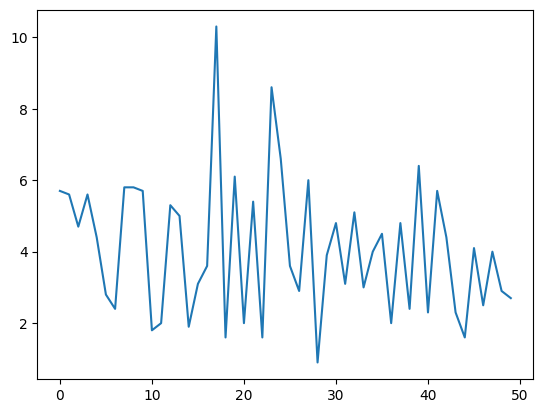

In [ ]:
estado["Murder.Rate"].plot.line()

<Axes: >

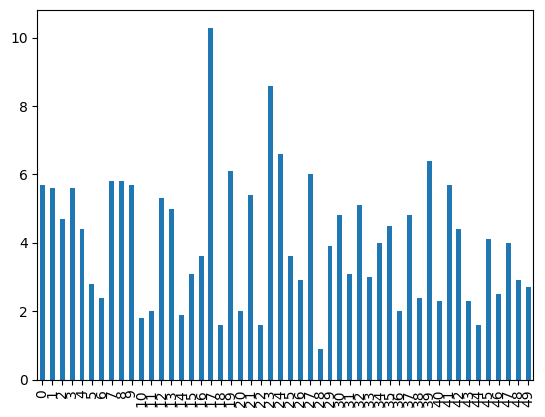

In [ ]:
estado["Murder.Rate"].plot.bar()

<Axes: >

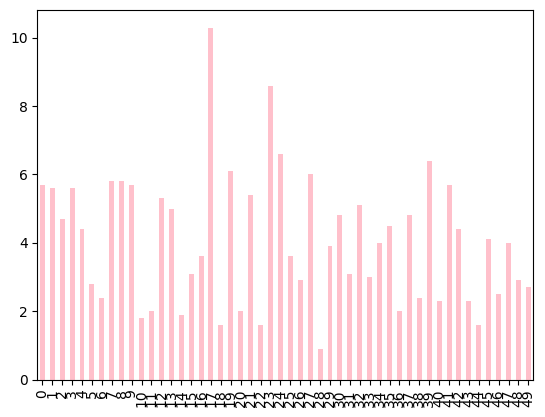

In [ ]:
estado["Murder.Rate"].plot.bar(color="pink")

<Axes: ylabel='Frequency'>

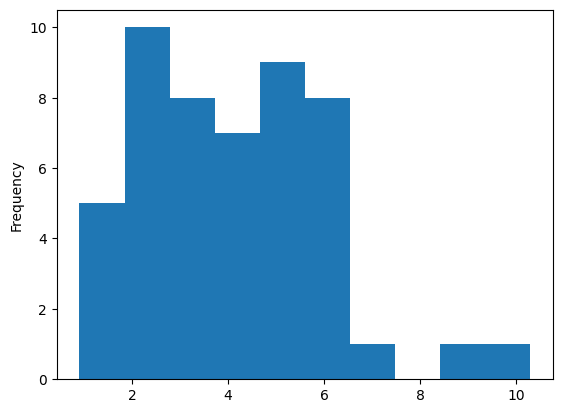

In [ ]:
estado["Murder.Rate"].plot.hist()

Text(0, 0.5, 'Frequency')

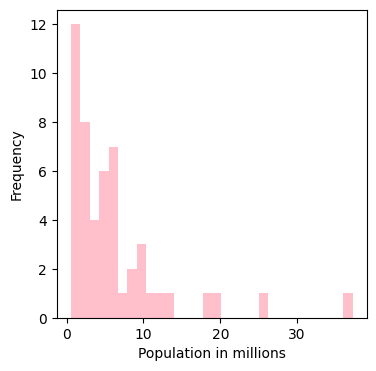

In [ ]:
ax=(estado.Population/1_000_000).plot.hist(figsize=(4,4), bins=30,color="pink")
ax.set_xlabel("Population in millions")
ax.set_ylabel("Frequency")

Text(0, 0.5, 'Frecuencia')

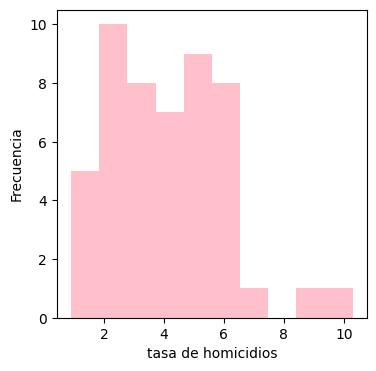

In [ ]:
ax=(estado['Murder.Rate']).plot.hist(figsize=(4,4),color="pink")
ax.set_xlabel("tasa de homicidios")
ax.set_ylabel("Frecuencia")

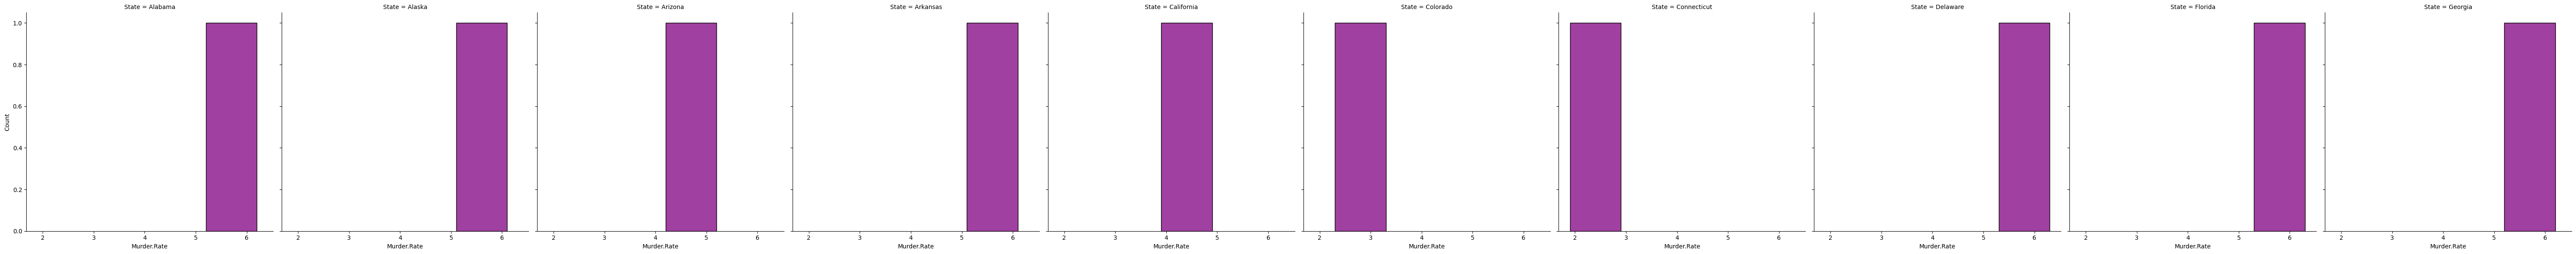

In [ ]:
analisis=estado.head(10)
g=sns.FacetGrid(analisis,col="State",height=6)
g.map(sns.histplot, "Murder.Rate", color="purple")  # Cambia el color del gráfico


In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("sandeep1080/bassburst")

print("Path to dataset files:", path)

100%|██████████| 1.34M/1.34M [00:00<00:00, 96.5MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/sandeep1080/bassburst/versions/2


In [4]:
import os

# Listar los archivos en el directorio descargado
files = os.listdir(path)
print(files)


['cleaned_speakers_data.csv']


In [5]:
import pandas as pd

# Suponiendo que el archivo CSV es 'data.csv'
csv_path = os.path.join(path, 'cleaned_speakers_data.csv')  # Asegúrate de que el nombre del archivo es correcto

# Cargar el CSV en un DataFrame de pandas
df = pd.read_csv(csv_path)

# Mostrar las primeras filas del DataFrame
print(df.head())


  user_id session_id sign_in                 name  demographic_age  \
0  U10477    S000001   Email  Victor Navarro-Noël               31   
1  U01536    S000002   Email                  王秀云               39   
2  U00107    S000003   Guest     Ucchal Sabharwal               68   
3  U13886    S000004   Email     Virginie Schmitt               72   
4  U05926    S000005   Email        Cynthia Drake               51   

  demographic_age_group demographic_gender                             email  \
0                 Adult             Female  victornavarronoël251@hotmail.com   
1                 Adult             Female                  王秀云617@gmail.com   
2                   Old               Male                      Not Provided   
3                   Old             Female      virginieschmitt827@gmail.com   
4                 Adult          No Answer        cynthiadrake47@hotmail.com   

     location    country  ... pages_visited conversion_flag conversion_type  \
0        Rome      

In [9]:
import pandas as pd
df = pd.read_csv(csv_path)


In [ ]:
df.head(10)

,user_id,session_id,sign_in,name,demographic_age,demographic_age_group,demographic_gender,email,location,country,...,pages_visited,conversion_flag,conversion_type,traffic_source,product_purchased,revenue_$,payment_type,card_type,coupon_applied,bounce_flag
0,U10477,S000001,Email,Victor Navarro-Noël,31,Adult,Female,victornavarronoël251@hotmail.com,Rome,Italy,...,7,0,NCT,Organic,NPP,0.00,NPT,NCAT,ND,1
1,U01536,S000002,Email,王秀云,39,Adult,Female,王秀云617@gmail.com,Madrid,Spain,...,5,0,NCT,Social,NPP,0.00,NPT,NCAT,ND,0
2,U00107,S000003,Guest,Ucchal Sabharwal,68,Old,Male,Not Provided,Manchester,UK,...,7,0,NCT,Organic,NPP,0.00,NPT,NCAT,ND,0
3,U13886,S000004,Email,Virginie Schmitt,72,Old,Female,virginieschmitt827@gmail.com,Sydney,Australia,...,10,0,NCT,Social,NPP,0.00,NPT,NCAT,ND,0
4,U05926,S000005,Email,Cynthia Drake,51,Adult,No Answer,cynthiadrake47@hotmail.com,Mumbai,India,...,6,0,NCT,Organic,NPP,0.00,NPT,NCAT,ND,0
5,U05821,S000006,Email,Laure-Suzanne Durand,35,Adult,Female,lauresuzannedurand719@gmail.com,Mumbai,India,...,9,0,NCT,Organic,NPP,0.00,NPT,NCAT,ND,1
6,U05314,S000007,Guest,Rachel Medina DVM,43,Adult,Female,Not Provided,Shanghai,China,...,10,1,Purchase,Social,Marshall Kilburn II,299.99,Card,Visa,No,0
7,U14984,S000008,Email,Damyanti Balasubramanian,45,Adult,Female,damyantibalasubramanian272@hotmail.com,Munich,Germany,...,10,0,NCT,Organic,NPP,0.00,NPT,NCAT,ND,0
8,U03594,S000009,Guest,Lipika Kata,79,Old,Female,Not Provided,Beijing,China,...,3,0,NCT,Social,NPP,0.00,NPT,NCAT,ND,0
9,U06917,S000010,Email,山本 亮介,73,Old,Female,山本亮介391@protonmail.com,Munich,Germany,...,2,0,NCT,Paid,NPP,0.00,NPT,NCAT,ND,0


In [ ]:
# Verificar si hay valores nulos en el DataFrame
nulos = df.isnull().sum()

# Mostrar el número de nulos por columna
print(nulos)


user_id                  0
session_id               0
sign_in                  0
name                     0
demographic_age          0
demographic_age_group    0
demographic_gender       0
email                    0
location                 0
country                  0
device_type              0
timestamp                0
variant_group            0
time_spent               0
pages_visited            0
conversion_flag          0
conversion_type          0
traffic_source           0
product_purchased        0
revenue_$                0
payment_type             0
card_type                0
coupon_applied           0
bounce_flag              0
dtype: int64


In [ ]:
# Verificar los tipos de datos de las columnas
print(df.dtypes)

# Listar las columnas
print(list(df.columns))

# Información general sobre el DataFrame
df.info()

# Estadísticas descriptivas
df.describe()


user_id                   object
session_id                object
sign_in                   object
name                      object
demographic_age            int64
demographic_age_group     object
demographic_gender        object
email                     object
location                  object
country                   object
device_type               object
timestamp                 object
variant_group             object
time_spent               float64
pages_visited              int64
conversion_flag            int64
conversion_type           object
traffic_source            object
product_purchased         object
revenue_$                float64
payment_type              object
card_type                 object
coupon_applied            object
bounce_flag                int64
dtype: object
['user_id', 'session_id', 'sign_in', 'name', 'demographic_age', 'demographic_age_group', 'demographic_gender', 'email', 'location', 'country', 'device_type', 'timestamp', 'variant_group', 'time_

,demographic_age,time_spent,pages_visited,conversion_flag,revenue_$,bounce_flag
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,46.905533,10.524185,5.501467,0.151167,26.208553,0.189067
std,19.405500,5.481363,2.874208,0.358217,137.294872,0.391568
min,14.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,30.000000,5.780000,3.000000,0.000000,0.000000,0.000000
50%,47.000000,10.580000,5.000000,0.000000,0.000000,0.000000
75%,64.000000,15.270000,8.000000,0.000000,0.000000,0.000000
max,80.000000,20.000000,10.000000,1.000000,2499.000000,1.000000


from matplotlib import pyplot as plt
_df_0['demographic_age'].plot(kind='hist', bins=20, title='demographic_age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['time_spent'].plot(kind='hist', bins=20, title='time_spent')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['pages_visited'].plot(kind='hist', bins=20, title='pages_visited')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['conversion_flag'].plot(kind='hist', bins=20, title='conversion_flag')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('index').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='demographic_age', y='time_spent', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='time_spent', y='pages_visited', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='pages_visited', y='conversion_flag', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='conversion_flag', y='revenue_$', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['time_spent']
  ys = series['demographic_age']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('time_spent', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('index')):
  _plot_series(series, series_name, i)
  fig.legend(title='index', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('time_spent')
_ = plt.ylabel('demographic_age')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['time_spent']
  ys = series['pages_visited']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('time_spent', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('index')):
  _plot_series(series, series_name, i)
  fig.legend(title='index', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('time_spent')
_ = plt.ylabel('pages_visited')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['time_spent']
  ys = series['conversion_flag']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('time_spent', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('index')):
  _plot_series(series, series_name, i)
  fig.legend(title='index', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('time_spent')
_ = plt.ylabel('conversion_flag')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['time_spent']
  ys = series['revenue_$']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_12.sort_values('time_spent', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('index')):
  _plot_series(series, series_name, i)
  fig.legend(title='index', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('time_spent')
_ = plt.ylabel('revenue_$')

from matplotlib import pyplot as plt
_df_13['demographic_age'].plot(kind='line', figsize=(8, 4), title='demographic_age')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['time_spent'].plot(kind='line', figsize=(8, 4), title='time_spent')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['pages_visited'].plot(kind='line', figsize=(8, 4), title='pages_visited')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_16['conversion_flag'].plot(kind='line', figsize=(8, 4), title='conversion_flag')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_17['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_17, x='demographic_age', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_18['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_18, x='time_spent', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_19['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_19, x='pages_visited', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_20['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_20, x='conversion_flag', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
# Estimando la media de las edades
mean_age = df["demographic_age"].mean()
print("Mean Age:", mean_age)


Mean Age: 46.90553333333333


In [ ]:
from scipy.stats import trim_mean

# Estimando la media recortada (10% de recorte)
trim_mean_age = trim_mean(df["demographic_age"], 0.1)
print("Trimmed Mean Age:", trim_mean_age)


Trimmed Mean Age: 46.87770833333333


In [ ]:
import numpy as np

# Estimación de la media ponderada de la columna 'demographic_age' usando 'revenue_$' como peso
weighted_mean_age = np.average(df["demographic_age"], weights=df["revenue_$"])
print("Weighted Mean Age:", weighted_mean_age)


Weighted Mean Age: 46.58578337639116


Conclusión del análisis:

Media simple: La edad promedio de la muestra es aproximadamente 46.91 años, lo que nos da una buena idea general de la población en términos de edad.

Media recortada: El efecto del recorte es mínimo en este conjunto de datos, con una media recortada de 46.88 años. Esto indica que los valores extremos no están afectando de manera significativa la media.

Media ponderada: Al dar más peso a los individuos con mayores ingresos, obtenemos una media ponderada de 46.59 años, lo que sugiere que, en general, las personas con ingresos más altos tienden a ser ligeramente más jóvenes que aquellas con ingresos más bajos.

En resumen, las tres formas de calcular la media (simple, recortada y ponderada) nos dan una visión bastante similar, lo que indica que no hay una gran variabilidad en las edades extremas o en los ingresos que altere significativamente el promedio de edad.

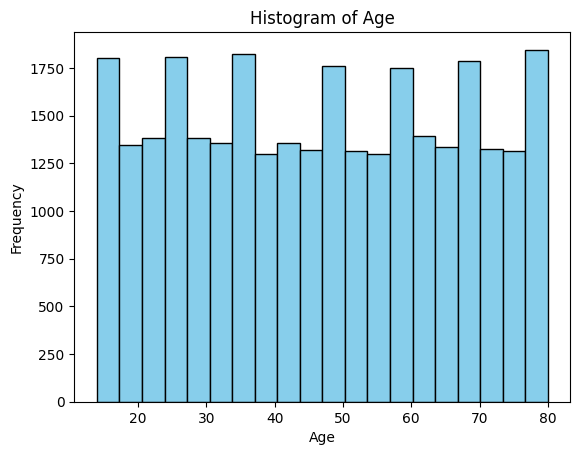

In [ ]:
import matplotlib.pyplot as plt

# Histograma de edades
df["demographic_age"].plot.hist(color="skyblue", bins=20, edgecolor='black')
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Histogram of Age")
plt.show()


In [ ]:
# Definir el diccionario con los nombres actuales y los nuevos nombres
nuevos_nombres = {
    'user_id': 'ID de Usuario',
    'session_id': 'ID de Sesión',
    'sign_in': 'Método de Inicio de Sesión',
    'name': 'Nombre',
    'demographic_age': 'Edad Demográfica',
    'demographic_age_group': 'Grupo de Edad',
    'demographic_gender': 'Género Demográfico',
    'email': 'Correo Electrónico',
    'location': 'Ubicación',
    'country': 'País',
    # Puedes añadir más columnas según sea necesario
}

# Renombrar las columnas
df.rename(columns=nuevos_nombres, inplace=True)

# Verificar los cambios en los nombres de las columnas
print(df.columns)


Index(['ID de Usuario', 'ID de Sesión', 'Método de Inicio de Sesión', 'Nombre',
       'Edad Demográfica', 'Grupo de Edad', 'Género Demográfico',
       'Correo Electrónico', 'Ubicación', 'País', 'device_type', 'timestamp',
       'variant_group', 'time_spent', 'pages_visited', 'conversion_flag',
       'conversion_type', 'traffic_source', 'product_purchased', 'revenue_$',
       'payment_type', 'card_type', 'coupon_applied', 'bounce_flag'],
      dtype='object')


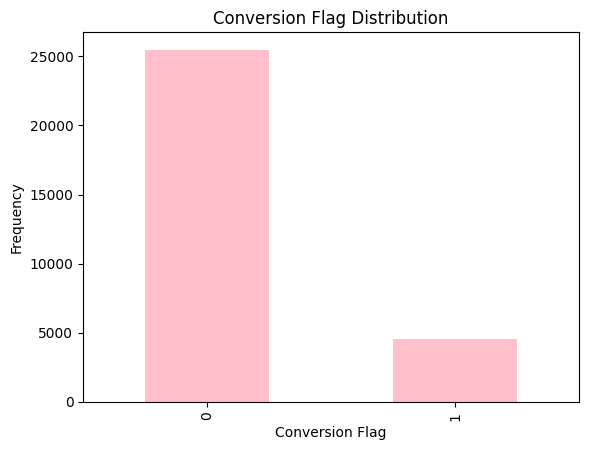

In [ ]:
# Gráfico de barras para 'conversion_flag' (0 = no conversión, 1 = conversión)
df["conversion_flag"].value_counts().plot.bar(color="pink")
plt.xlabel("Conversion Flag")
plt.ylabel("Frequency")
plt.title("Conversion Flag Distribution")
plt.show()


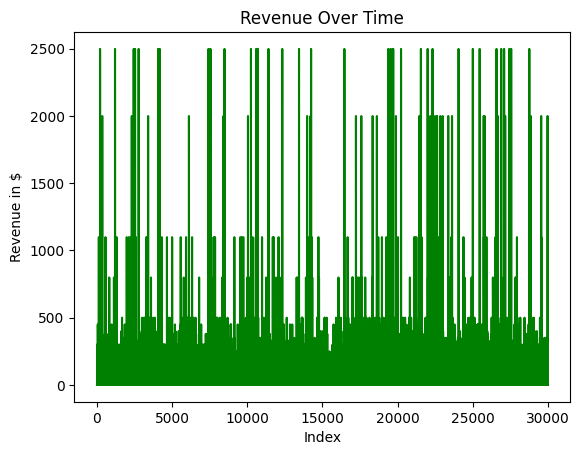

In [ ]:
df["revenue_$"].plot.line(color="green")
plt.xlabel("Index")
plt.ylabel("Revenue in $")
plt.title("Revenue Over Time")
plt.show()


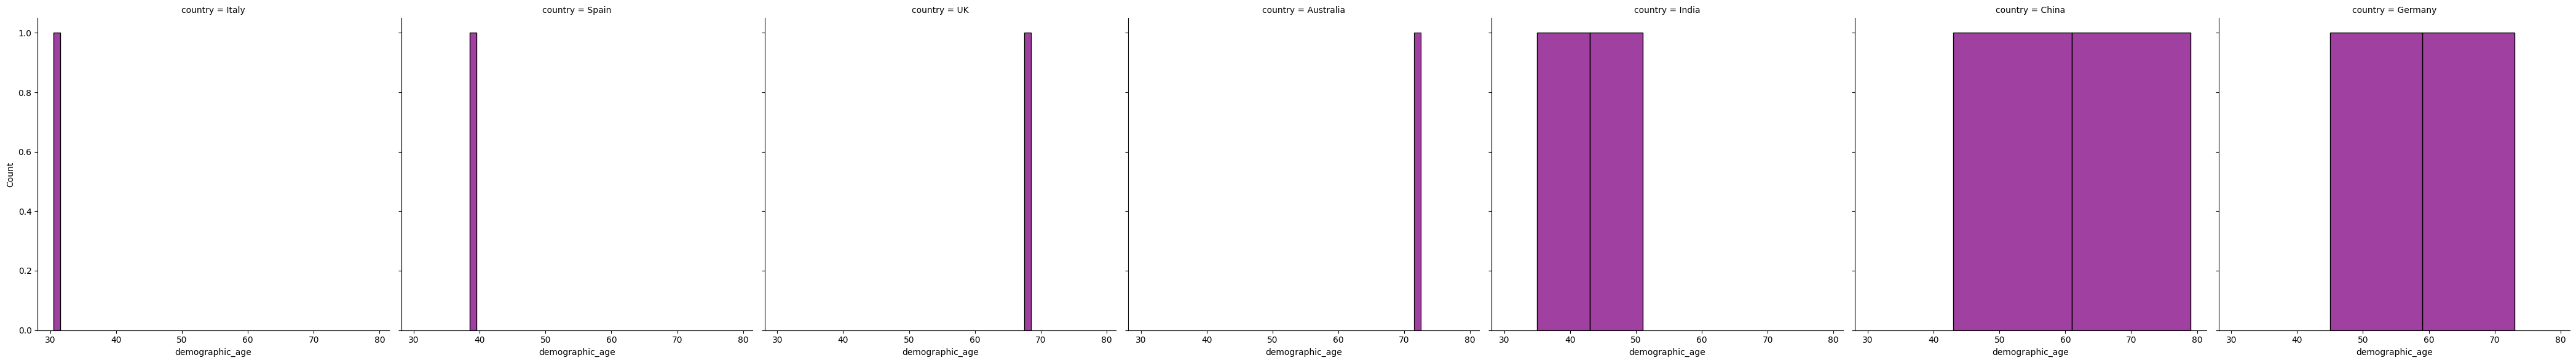

In [ ]:
import seaborn as sns

# Seleccionar las primeras 10 filas para un análisis rápido
analisis = df.head(10)

# Crear un FacetGrid para mostrar la distribución de 'demographic_age' por 'country'
g = sns.FacetGrid(analisis, col="country", height=6)
g.map(sns.histplot, "demographic_age", color="purple")
plt.show()


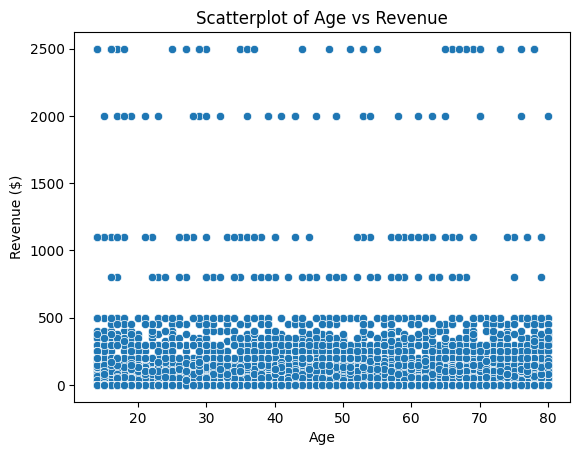

In [ ]:
# Gráfico de dispersión entre 'demographic_age' y 'revenue_$'
sns.scatterplot(x="demographic_age", y="revenue_$", data=df)
plt.xlabel("Age")
plt.ylabel("Revenue ($)")
plt.title("Scatterplot of Age vs Revenue")
plt.show()


In [ ]:
df.head(10)

,ID de Usuario,ID de Sesión,Método de Inicio de Sesión,Nombre,Edad Demográfica,Grupo de Edad,Género Demográfico,Correo Electrónico,Ubicación,País,...,pages_visited,conversion_flag,conversion_type,traffic_source,product_purchased,revenue_$,payment_type,card_type,coupon_applied,bounce_flag
0,U10477,S000001,Email,Victor Navarro-Noël,31,Adult,Female,victornavarronoël251@hotmail.com,Rome,Italy,...,7,0,NCT,Organic,NPP,0.00,NPT,NCAT,ND,1
1,U01536,S000002,Email,王秀云,39,Adult,Female,王秀云617@gmail.com,Madrid,Spain,...,5,0,NCT,Social,NPP,0.00,NPT,NCAT,ND,0
2,U00107,S000003,Guest,Ucchal Sabharwal,68,Old,Male,Not Provided,Manchester,UK,...,7,0,NCT,Organic,NPP,0.00,NPT,NCAT,ND,0
3,U13886,S000004,Email,Virginie Schmitt,72,Old,Female,virginieschmitt827@gmail.com,Sydney,Australia,...,10,0,NCT,Social,NPP,0.00,NPT,NCAT,ND,0
4,U05926,S000005,Email,Cynthia Drake,51,Adult,No Answer,cynthiadrake47@hotmail.com,Mumbai,India,...,6,0,NCT,Organic,NPP,0.00,NPT,NCAT,ND,0
5,U05821,S000006,Email,Laure-Suzanne Durand,35,Adult,Female,lauresuzannedurand719@gmail.com,Mumbai,India,...,9,0,NCT,Organic,NPP,0.00,NPT,NCAT,ND,1
6,U05314,S000007,Guest,Rachel Medina DVM,43,Adult,Female,Not Provided,Shanghai,China,...,10,1,Purchase,Social,Marshall Kilburn II,299.99,Card,Visa,No,0
7,U14984,S000008,Email,Damyanti Balasubramanian,45,Adult,Female,damyantibalasubramanian272@hotmail.com,Munich,Germany,...,10,0,NCT,Organic,NPP,0.00,NPT,NCAT,ND,0
8,U03594,S000009,Guest,Lipika Kata,79,Old,Female,Not Provided,Beijing,China,...,3,0,NCT,Social,NPP,0.00,NPT,NCAT,ND,0
9,U06917,S000010,Email,山本 亮介,73,Old,Female,山本亮介391@protonmail.com,Munich,Germany,...,2,0,NCT,Paid,NPP,0.00,NPT,NCAT,ND,0


In [ ]:
# Verificar si hay valores nulos en las columnas relevantes
print(df[['Edad Demográfica', 'Género Demográfico']].isnull().sum())


Edad Demográfica      0
Género Demográfico    0
dtype: int64


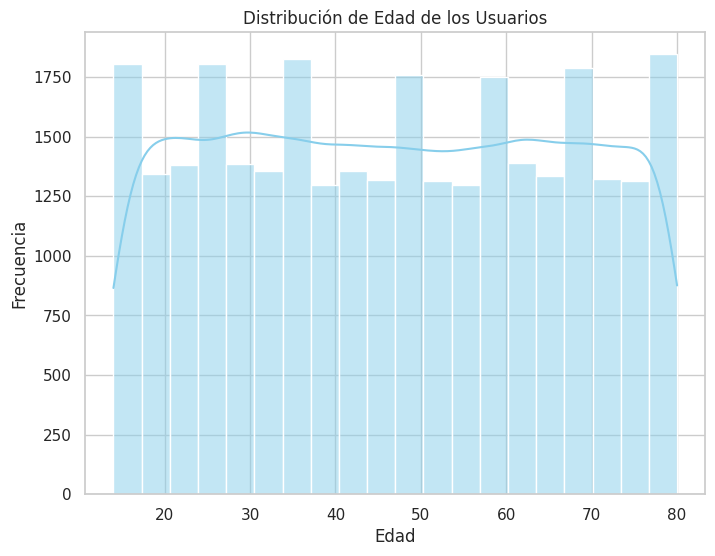

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar el estilo de Seaborn
sns.set(style="whitegrid")

# Crear un histograma para la distribución de la Edad
plt.figure(figsize=(8, 6))
sns.histplot(df['Edad Demográfica'], kde=True, color='skyblue', bins=20)
plt.title('Distribución de Edad de los Usuarios')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()


<ipython-input-78-44a3ea0dfd8b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Género Demográfico', y='Edad Demográfica', data=df, palette='muted')


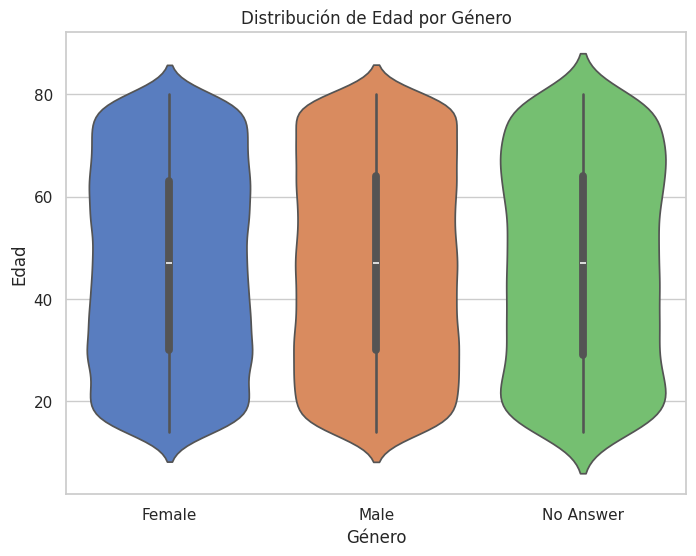

In [ ]:
# Crear un gráfico de violín para comparar la distribución de Edad por Género
plt.figure(figsize=(8, 6))
sns.violinplot(x='Género Demográfico', y='Edad Demográfica', data=df, palette='muted')
plt.title('Distribución de Edad por Género')
plt.xlabel('Género')
plt.ylabel('Edad')
plt.show()


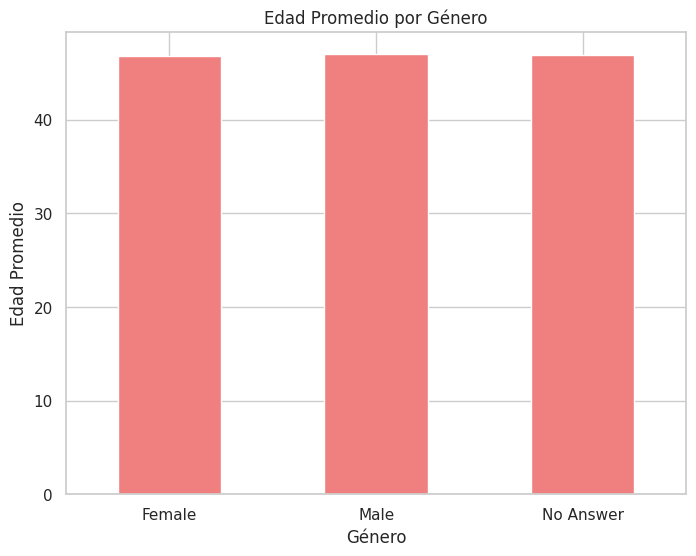

In [ ]:
# Calcular la edad promedio por género
edad_promedio_por_genero = df.groupby('Género Demográfico')['Edad Demográfica'].mean()

# Crear un gráfico de barras
plt.figure(figsize=(8, 6))
edad_promedio_por_genero.plot(kind='bar', color='lightcoral')
plt.title('Edad Promedio por Género')
plt.xlabel('Género')
plt.ylabel('Edad Promedio')
plt.xticks(rotation=0)
plt.show()


In [ ]:
# Filtrar las filas donde se realizó una compra
compras = df[df['conversion_flag'] == 1]

# Ver las primeras filas para asegurarnos de que el filtro se hizo correctamente
print(compras[['Género Demográfico', 'product_purchased']].head())


   Género Demográfico     product_purchased
6              Female   Marshall Kilburn II
17               Male  Ultimate Ears Roll 2
22          No Answer                   NPP
27             Female                   NPP
37               Male                   NPP


In [ ]:
# Contar las compras por género
compras_por_genero = compras['Género Demográfico'].value_counts()

# Mostrar el número de compras por género
print(compras_por_genero)


Género Demográfico
Female       2062
Male         2017
No Answer     456
Name: count, dtype: int64


<ipython-input-83-ec93300481c2>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=compras_por_genero.index, y=compras_por_genero.values, palette='Set1')


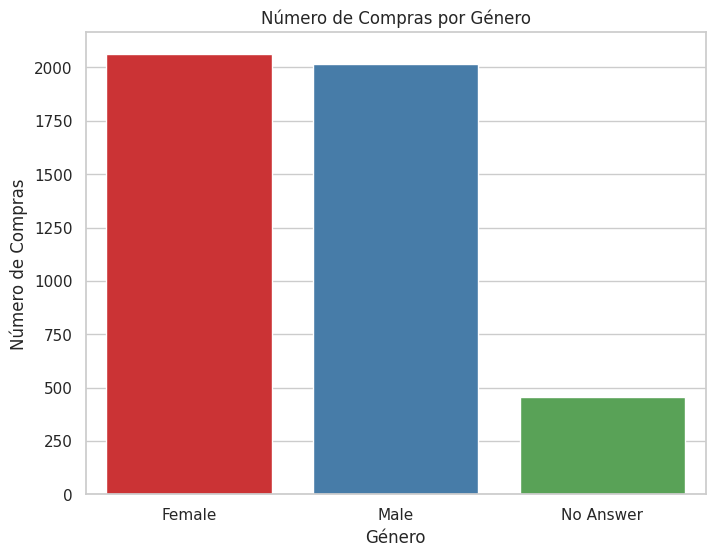

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear un gráfico de barras para ver las compras por género
plt.figure(figsize=(8, 6))
sns.barplot(x=compras_por_genero.index, y=compras_por_genero.values, palette='Set1')
plt.title('Número de Compras por Género')
plt.xlabel('Género')
plt.ylabel('Número de Compras')
plt.show()


In [ ]:
# Contar las compras por género y producto
compras_por_genero_producto = compras.groupby(['Género Demográfico', 'product_purchased']).size().reset_index(name='purchase_count')

# Ver las primeras filas para tener una idea de los datos
print(compras_por_genero_producto.head())


  Género Demográfico                 product_purchased  purchase_count
0             Female                 Anker Soundcore 2              13
1             Female                 Anker Soundcore 3              28
2             Female           Anker Soundcore Flare 2              21
3             Female       Anker Soundcore Motion Boom              14
4             Female  Anker Soundcore Motion Boom Plus              19


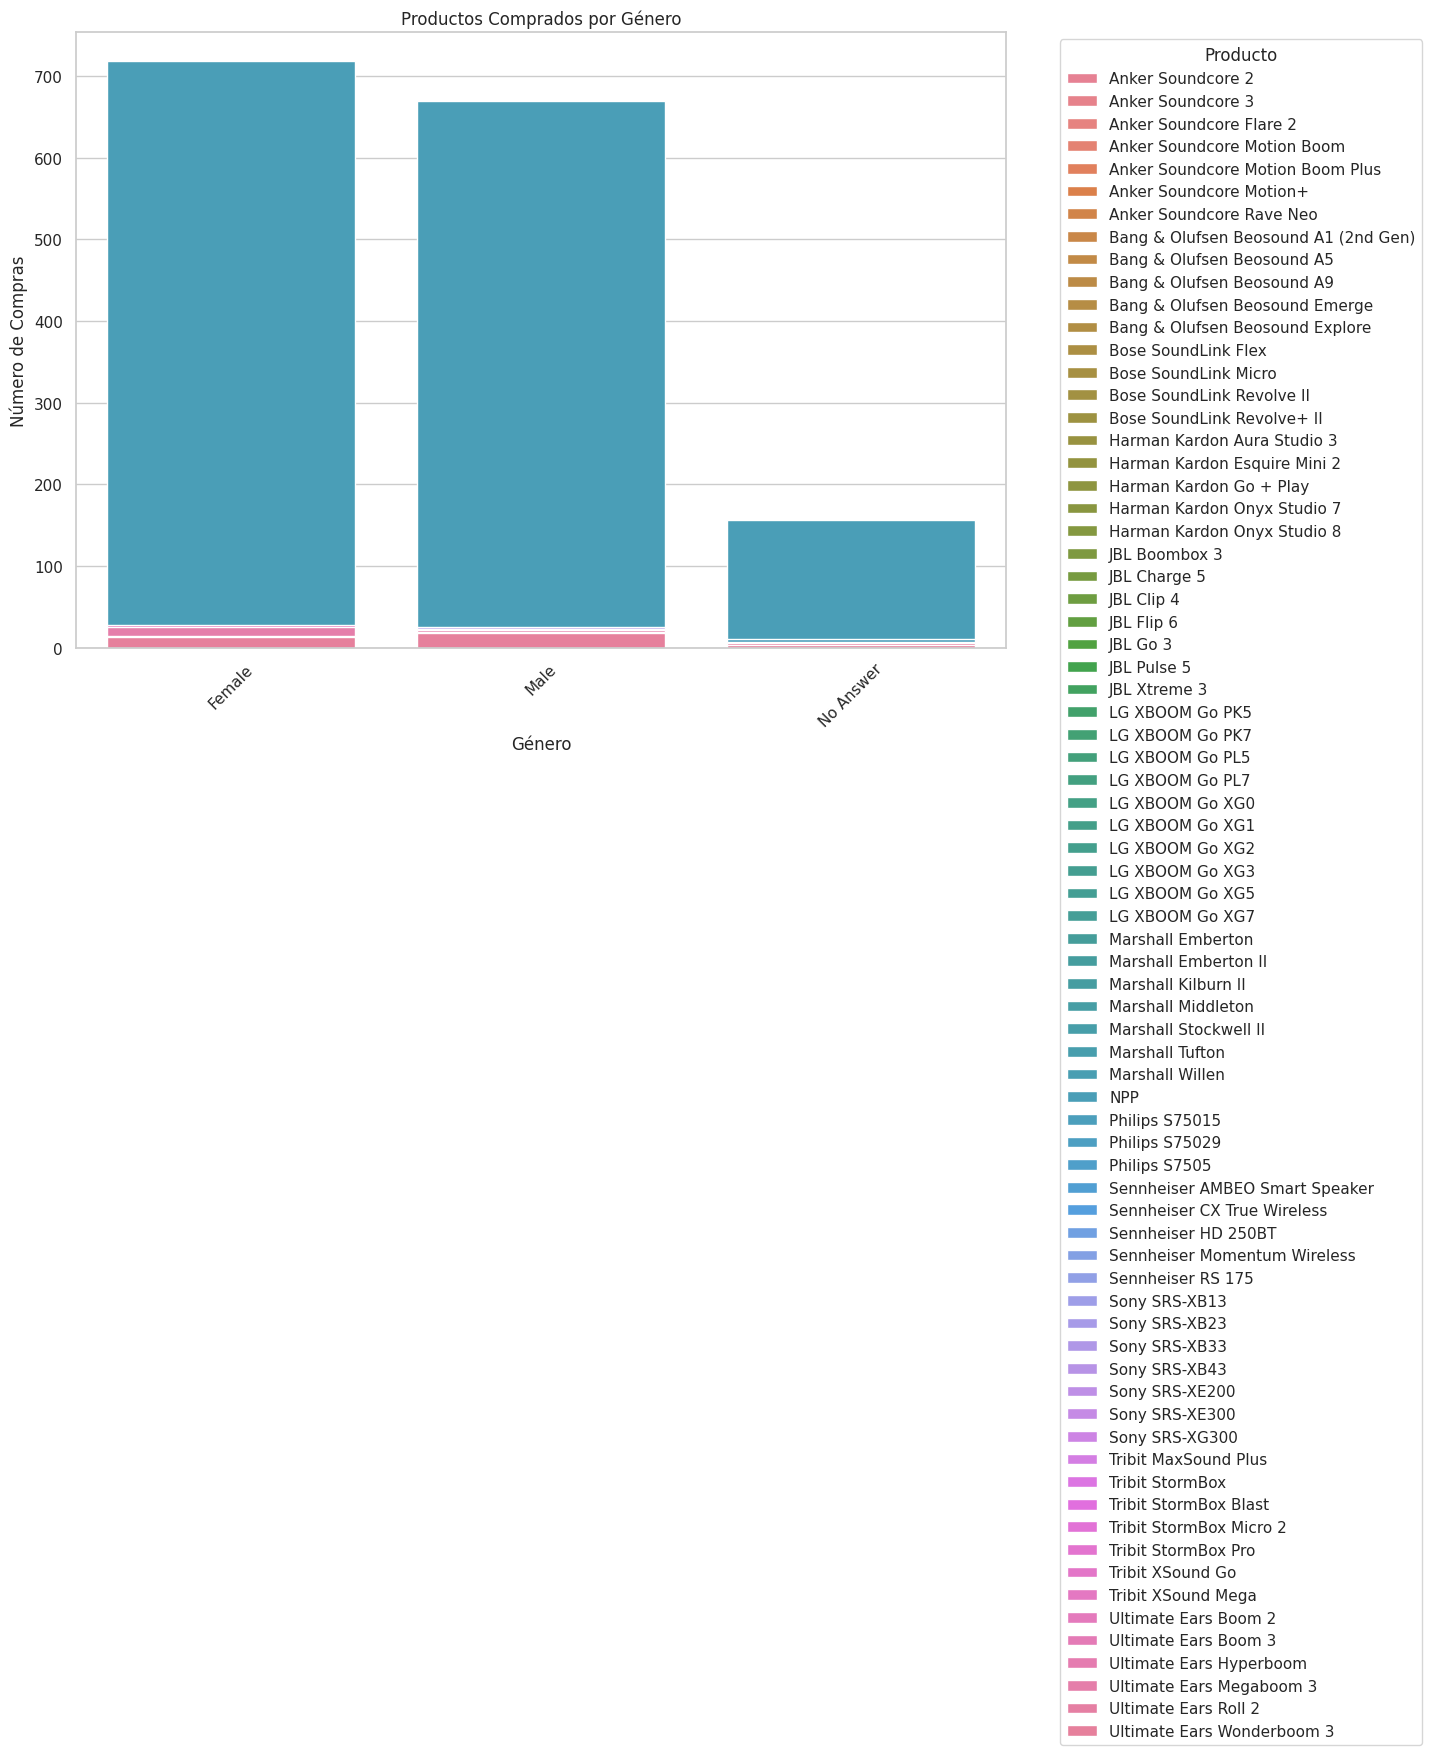

In [ ]:
# Crear un gráfico de barras apiladas para ver qué productos fueron comprados por cada género
plt.figure(figsize=(12, 8))
sns.barplot(x='Género Demográfico', y='purchase_count', hue='product_purchased', data=compras_por_genero_producto, dodge=False)
plt.title('Productos Comprados por Género')
plt.xlabel('Género')
plt.ylabel('Número de Compras')
plt.xticks(rotation=45)
plt.legend(title='Producto', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


Este análisis nos permitirá ver si hay diferencias notables en la cantidad de compras realizadas por diferentes géneros y qué productos son más populares en cada grupo de género. Con esto, podrás responder a la pregunta de si el género influye en la compra de productos.

concluyo con que la mujer tiene una leve tendencia en compras_por_genero

In [10]:
df.head()  # Muestra las primeras filas
df.info()  # Información general
df.describe()  # Estadísticas básicas


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                30000 non-null  object 
 1   session_id             30000 non-null  object 
 2   sign_in                30000 non-null  object 
 3   name                   30000 non-null  object 
 4   demographic_age        30000 non-null  int64  
 5   demographic_age_group  30000 non-null  object 
 6   demographic_gender     30000 non-null  object 
 7   email                  30000 non-null  object 
 8   location               30000 non-null  object 
 9   country                30000 non-null  object 
 10  device_type            30000 non-null  object 
 11  timestamp              30000 non-null  object 
 12  variant_group          30000 non-null  object 
 13  time_spent             30000 non-null  float64
 14  pages_visited          30000 non-null  int64  
 15  co

,demographic_age,time_spent,pages_visited,conversion_flag,revenue_$,bounce_flag
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,46.905533,10.524185,5.501467,0.151167,26.208553,0.189067
std,19.405500,5.481363,2.874208,0.358217,137.294872,0.391568
min,14.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,30.000000,5.780000,3.000000,0.000000,0.000000,0.000000
50%,47.000000,10.580000,5.000000,0.000000,0.000000,0.000000
75%,64.000000,15.270000,8.000000,0.000000,0.000000,0.000000
max,80.000000,20.000000,10.000000,1.000000,2499.000000,1.000000


In [11]:
df.isnull().sum()  # Ver cuántos valores faltan por columna


,0
user_id,0
session_id,0
sign_in,0
name,0
demographic_age,0
demographic_age_group,0
demographic_gender,0
email,0
location,0
country,0


In [20]:
std_dev = df['time_spent'].std()
mad = df['time_spent'].sub(df['time_spent'].mean()).abs().mean()

print(f"Desviación estándar: {std_dev}")
print(f"MAD: {mad}")




Desviación estándar: 5.481363289112074
MAD: 4.750412882666666


In [19]:
q1 = df['time_spent'].quantile(0.25)
q3 = df['time_spent'].quantile(0.75)
iqr = q3 - q1

print(f"IQR: {iqr}")


IQR: 9.489999999999998


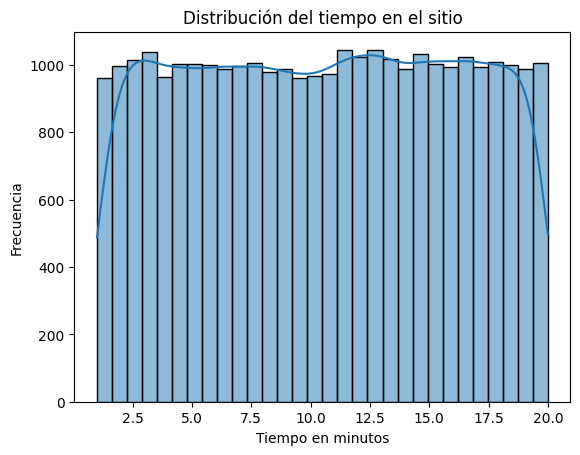

In [21]:
sns.histplot(df['time_spent'], bins=30, kde=True)
plt.title("Distribución del tiempo en el sitio")
plt.xlabel("Tiempo en minutos")
plt.ylabel("Frecuencia")
plt.show()

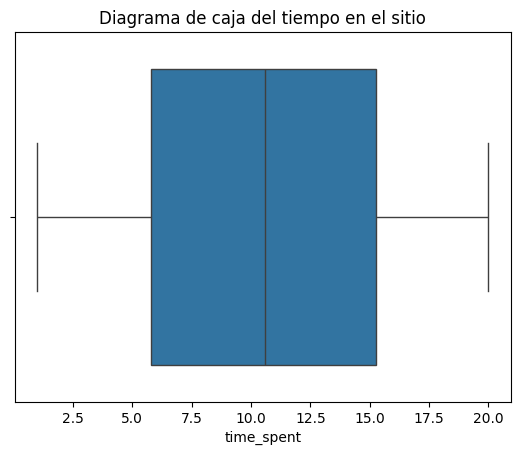

In [22]:
sns.boxplot(x=df['time_spent'])
plt.title("Diagrama de caja del tiempo en el sitio")
plt.show()

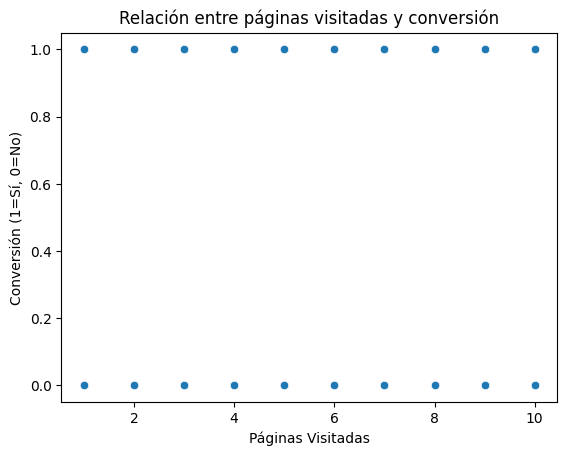

In [23]:
sns.scatterplot(x=df['pages_visited'], y=df['conversion_flag'])
plt.title("Relación entre páginas visitadas y conversión")
plt.xlabel("Páginas Visitadas")
plt.ylabel("Conversión (1=Sí, 0=No)")
plt.show()


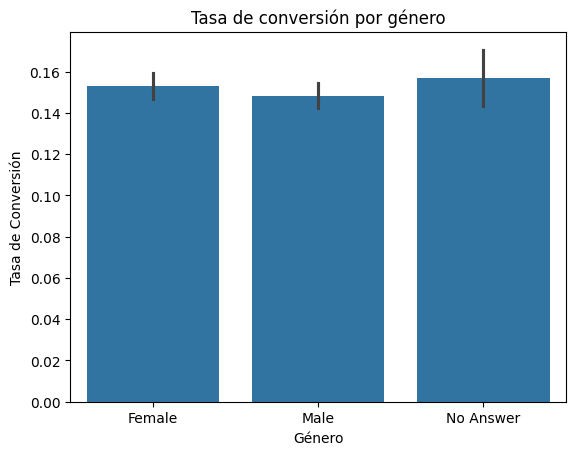

In [24]:
sns.barplot(x=df['demographic_gender'], y=df['conversion_flag'])
plt.title("Tasa de conversión por género")
plt.xlabel("Género")
plt.ylabel("Tasa de Conversión")
plt.show()


In [26]:
df['percentil_time_spent'] = pd.qcut(df['time_spent'], q=4, labels=["Bajo", "Medio-Bajo", "Medio-Alto", "Alto"])
df.groupby('percentil_time_spent').size()



<ipython-input-26-e57edf6f6978>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('percentil_time_spent').size()


,0
percentil_time_spent,
Bajo,7513
Medio-Bajo,7499
Medio-Alto,7502
Alto,7486
